<h2> Step 1: Set Up Your Environment</h2>

In [25]:
pip install ydata-profiling

<h2>Step 2: Import Required Libraries</h2>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

<h2> Step 3: Load the Dataset</h2>

In [27]:
data = pd.read_csv('/content/stocks.csv')
print(data.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


<h2>Step 4: Basic Checks</h2>

In [28]:
print(data.info())
print(data.describe())
print(data['Ticker'].unique())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB
None
             Open        High         Low       Close   Adj Close  \
count  248.000000  248.000000  248.000000  248.000000  248.000000   
mean   215.252093  217.919662  212.697452  215.381674  215.362697   
std     91.691315   92.863023   90.147881   91.461989   91.454750   
min     89.540001   90.129997   88.860001   89.349998   89.349998   
25%    135.235004  137.440004  134.822495  136.347498  136.347498   
50%    208.764

<h2>Step 5: Convert Date Column</h2>

In [29]:
data['Date'] = pd.to_datetime(data['Date'])

<h2>Step 6: Exploratory Data Analysis (EDA)</h2>

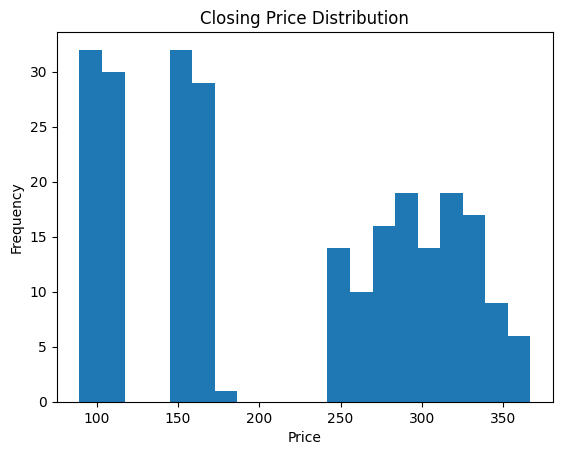

In [30]:
plt.hist(data['Close'], bins=20)
plt.title('Closing Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<h2>Volume by Ticker</h2>

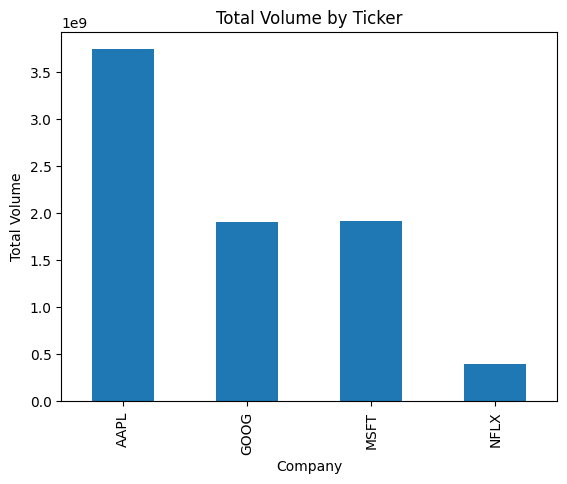

In [31]:
data.groupby('Ticker')['Volume'].sum().plot(kind='bar', title='Total Volume by Ticker')
plt.xlabel('Company')
plt.ylabel('Total Volume')
plt.show()

<h2>Volume vs Close</h2>

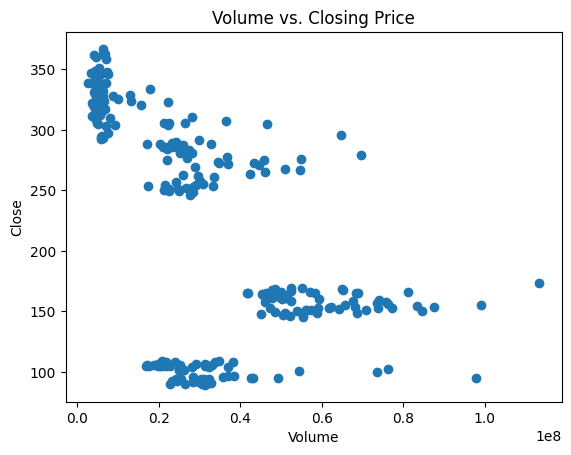

In [32]:
plt.scatter(data['Volume'], data['Close'])
plt.title('Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.show()

<h2>Boxplot for Close</h2>

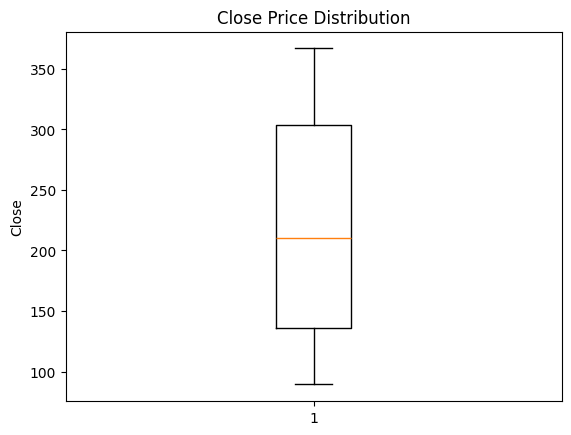

In [33]:
plt.boxplot(data['Close'])
plt.title('Close Price Distribution')
plt.ylabel('Close')
plt.show()

<h2>Correlation Heatmap</h2>

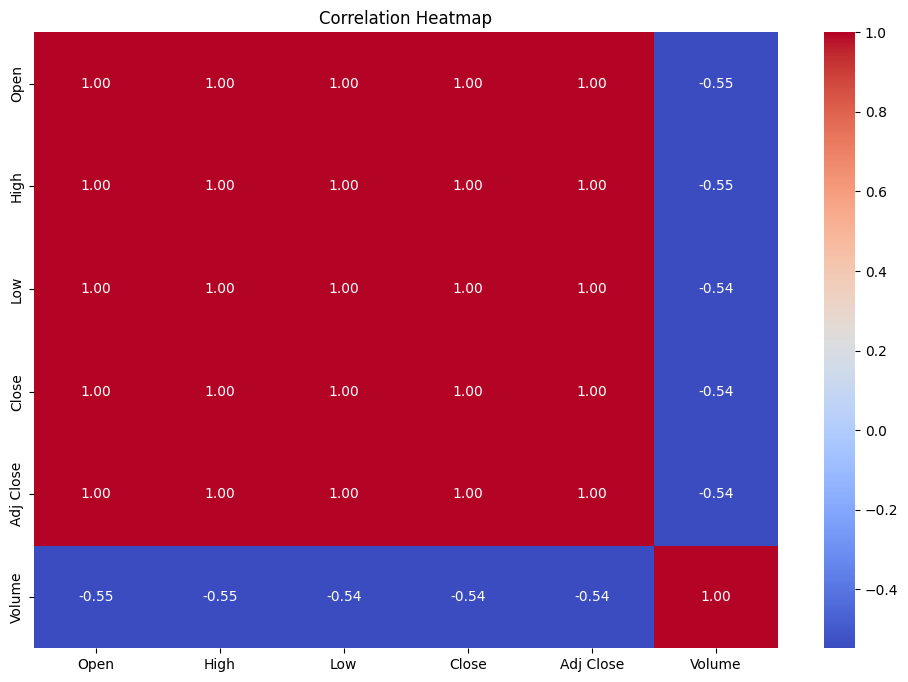

In [34]:
numeric_data = data.drop(['Ticker', 'Date'], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<h2>Step 7: Moving Averages and Volatility</h2>

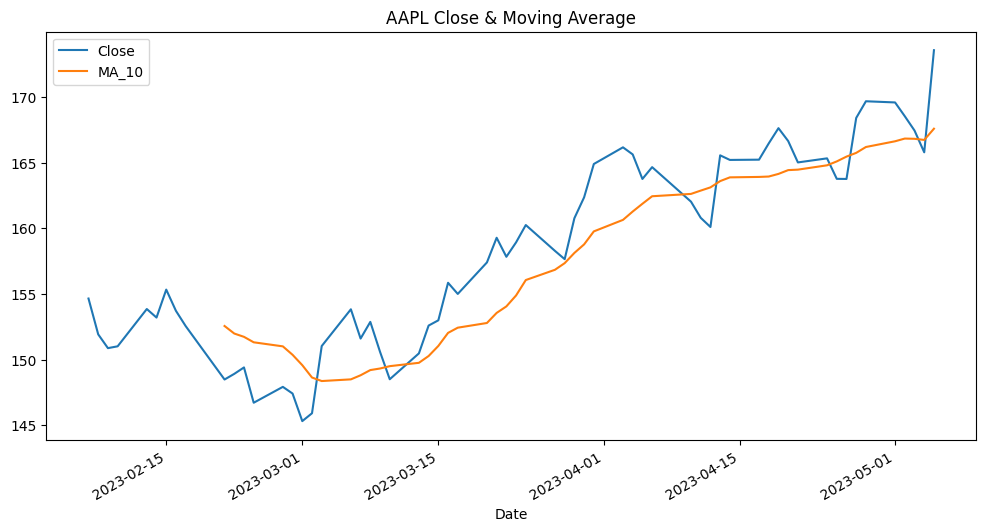

In [35]:
apple_data = data[data['Ticker'] == 'AAPL'].copy()
apple_data.set_index('Date', inplace=True)
apple_data['MA_10'] = apple_data['Close'].rolling(window=10).mean()
apple_data['Volatility'] = apple_data['Close'].rolling(window=10).std()

apple_data[['Close', 'MA_10']].plot(figsize=(12, 6), title='AAPL Close & Moving Average')
plt.show()

<h2>Step 8: Predictive Modeling Example</h2>

In [36]:
# Filter a single company (optional)
df = data.copy()
df = pd.get_dummies(df, columns=['Ticker'], drop_first=True)
df = df.drop(['Date'], axis=1)

X = df.drop('Close', axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 0.015528953533052453
R2 Score: 0.9999980965799584


<h2>Step 9: Profiling Report</h2>

In [37]:
profile = ProfileReport(data, title='Stock Market EDA Report')
profile.to_file('stock_analysis_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 95.89it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<h2>Step 10: Correlation Between Stocks</h2>

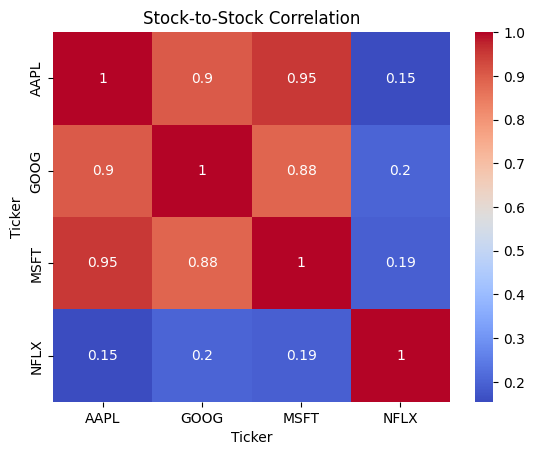

In [38]:
pivot_close = data.pivot_table(values='Close', index='Date', columns='Ticker')
sns.heatmap(pivot_close.corr(), annot=True, cmap='coolwarm')
plt.title('Stock-to-Stock Correlation')
plt.show()

<h2>Line Plot of Closing Prices Over Time by Ticker</h2>

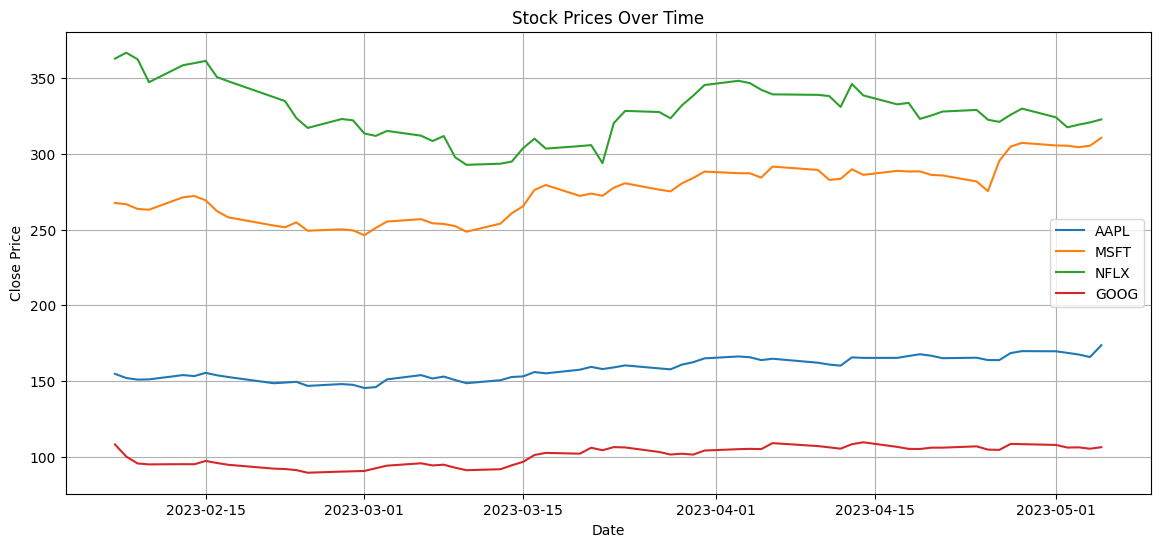

In [39]:
plt.figure(figsize=(14, 6))
for ticker in data['Ticker'].unique():
    subset = data[data['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Close'], label=ticker)
plt.legend()
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


<h2>Candlestick Chart (Using Plotly)</h2>

In [41]:
apple = data[data['Ticker'] == 'AAPL']
fig = go.Figure(data=[go.Candlestick(x=apple['Date'],
                open=apple['Open'],
                high=apple['High'],
                low=apple['Low'],
                close=apple['Close'])])
fig.update_layout(title='AAPL Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

<h2>Volatility Plot (Rolling Std Dev)</h2>

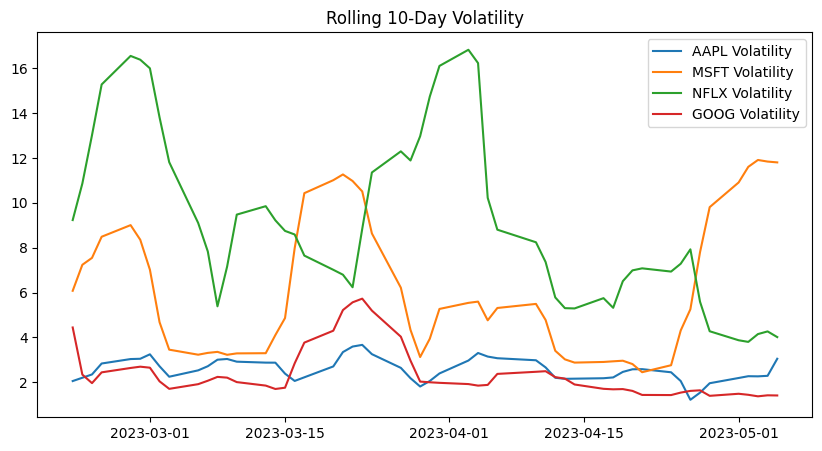

In [42]:
plt.figure(figsize=(10, 5))
for ticker in data['Ticker'].unique():
    temp = data[data['Ticker'] == ticker].copy()
    temp.set_index('Date', inplace=True)
    volatility = temp['Close'].rolling(window=10).std()
    plt.plot(volatility, label=f'{ticker} Volatility')
plt.legend()
plt.title('Rolling 10-Day Volatility')
plt.show()

<h2>Moving Average Comparison (Close vs MA)</h2>

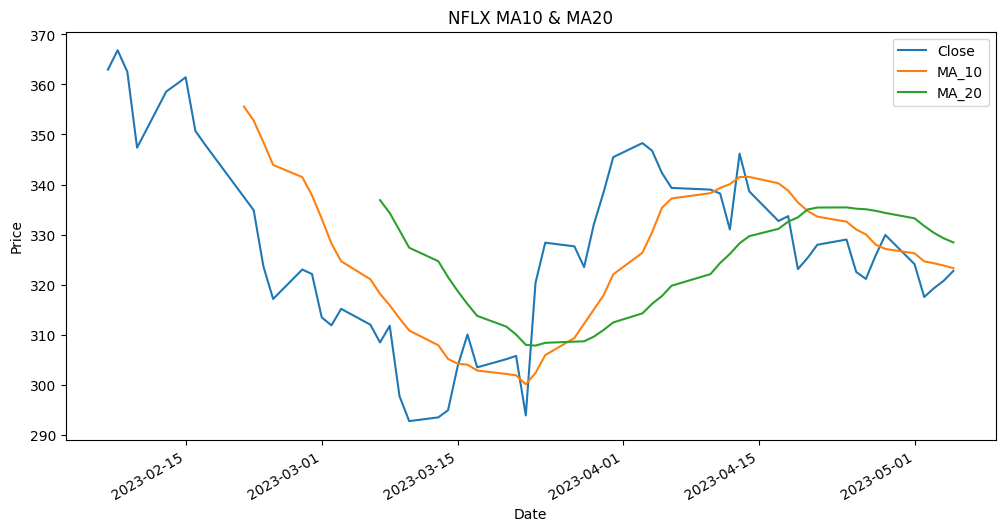

In [43]:
ticker = 'NFLX'
netflix = data[data['Ticker'] == ticker].copy()
netflix.set_index('Date', inplace=True)
netflix['MA_10'] = netflix['Close'].rolling(10).mean()
netflix['MA_20'] = netflix['Close'].rolling(20).mean()

netflix[['Close', 'MA_10', 'MA_20']].plot(figsize=(12, 6), title=f'{ticker} MA10 & MA20')
plt.ylabel('Price')
plt.show()

<h2>Histogram of Volume per Stock</h2>

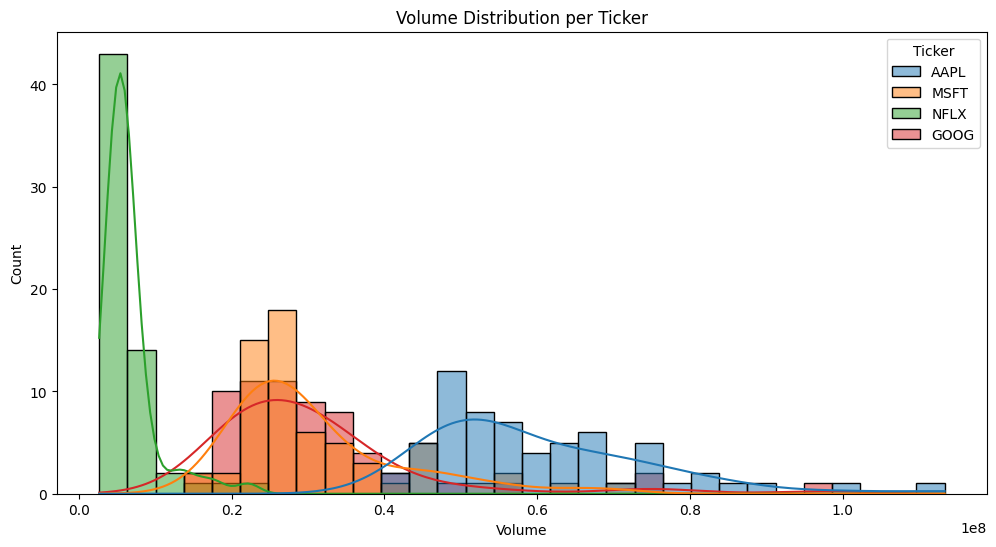

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Volume', hue='Ticker', bins=30, kde=True)
plt.title('Volume Distribution per Ticker')
plt.show()

<h2>Pairplot of Price Variables</h2>

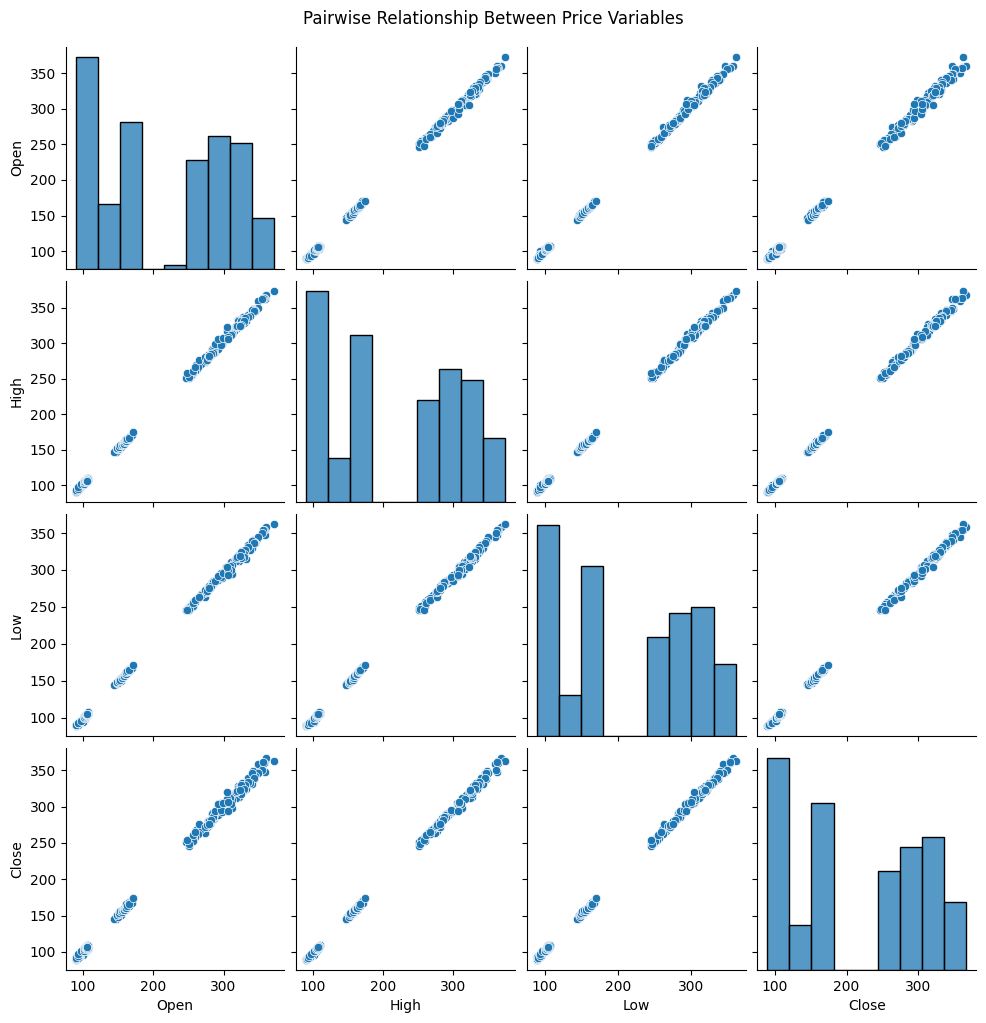

In [47]:
sns.pairplot(data[['Open', 'High', 'Low', 'Close']])
plt.suptitle('Pairwise Relationship Between Price Variables', y=1.02)
plt.show()

<h2>Correlation Heatmap for Individual Stock</h2>

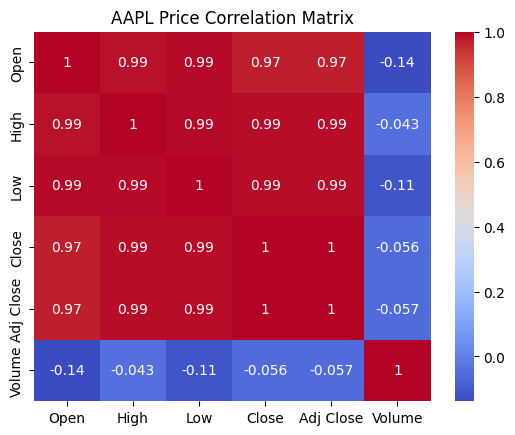

In [51]:
apple = data[data['Ticker'] == 'AAPL'].drop(['Ticker', 'Date'], axis=1)
sns.heatmap(apple.corr(), annot=True, cmap='coolwarm')
plt.title('AAPL Price Correlation Matrix')
plt.show()